In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%time
main_df = pd.read_csv('Taxi_trip_ML.csv',index_col='Unnamed: 0')
main_df

C:\Users\65915\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Wall time: 2.7 s


,Trip Seconds,Trip Miles,Fare,Payment Type,Company,Local_pickup,Local_dropoff,day,time_frame
0,1021,3.17,13.25,Cash,Flash Cab,False,True,Friday,Midnight
1,56047,7.10,20.50,Cash,Flash Cab,True,False,Friday,Midnight
2,120,0.10,3.50,Cash,Taxi Affiliation Services,True,True,Friday,Midnight
4,50,0.38,4.00,Cash,Flash Cab,True,True,Friday,Midnight
5,960,10.60,28.00,Cash,Taxi Affiliation Services,True,False,Friday,Midnight
...,...,...,...,...,...,...,...,...,...
3948010,724,2.08,9.25,Credit Card,Flash Cab,True,True,Friday,Night
3948011,496,3.49,11.50,Cash,Flash Cab,True,True,Friday,Night
3948013,1261,13.40,34.00,Credit Card,City Service,False,True,Friday,Night
3948016,900,0.30,18.00,Credit Card,Taxi Affiliation Services,True,False,Friday,Night


### Trip Seconds and Miles are correlated.
### Trip Seconds and Miles have little correlation to the Fare

<AxesSubplot:>

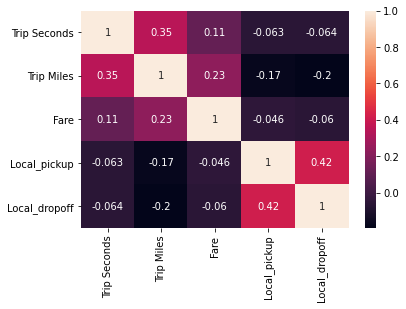

In [5]:
sns.heatmap(main_df.corr(),annot=True)

### Only focus on top 5 competitors

In [91]:
extracted = main_df[main_df['Company'].isin(['Flash Cab', 'Taxi Affiliation Services', 'Sun Taxi', 'City Service',
       'Medallion Leasin'])]

In [93]:
extracted

,Trip Seconds,Trip Miles,Fare,Payment Type,Company,Local_pickup,Local_dropoff,day,time_frame
0,1021,3.17,13.25,Cash,Flash Cab,False,True,Friday,Midnight
1,56047,7.10,20.50,Cash,Flash Cab,True,False,Friday,Midnight
2,120,0.10,3.50,Cash,Taxi Affiliation Services,True,True,Friday,Midnight
4,50,0.38,4.00,Cash,Flash Cab,True,True,Friday,Midnight
5,960,10.60,28.00,Cash,Taxi Affiliation Services,True,False,Friday,Midnight
...,...,...,...,...,...,...,...,...,...
3948010,724,2.08,9.25,Credit Card,Flash Cab,True,True,Friday,Night
3948011,496,3.49,11.50,Cash,Flash Cab,True,True,Friday,Night
3948013,1261,13.40,34.00,Credit Card,City Service,False,True,Friday,Night
3948016,900,0.30,18.00,Credit Card,Taxi Affiliation Services,True,False,Friday,Night


### Data Processing

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [15]:
extracted.columns


Index(['Trip Seconds', 'Trip Miles', 'Fare', 'Payment Type', 'Company',
       'Local_pickup', 'Local_dropoff', 'day', 'time_frame'],
      dtype='object')

### One hot encoding for Nominal Features

In [16]:
def one_hot_encoding(data, nominal_features):   
    X = data[nominal_features]
    X = X.values
    X = X.astype(str)
    encoded_x = None
    for i in range(0, X.shape[1]):
        label_encoder = LabelEncoder()
        feature = label_encoder.fit_transform(X[:,i])
        feature = feature.reshape(X.shape[0], 1)
        onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
        feature = onehot_encoder.fit_transform(feature)
        if encoded_x is None:
            encoded_x = feature
        else:
            encoded_x = np.concatenate((encoded_x, feature), axis=1)
    return encoded_x
    print("X shape: : ", encoded_x.shape)

In [17]:
encoded_x = one_hot_encoding(data = extracted,nominal_features = ['Payment Type', 'Company',
                                                                'Local_pickup', 'Local_dropoff', 'day'])

In [98]:
pd.DataFrame(encoded_x)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448041,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2448042,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2448043,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2448044,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# label encoding
extracted['time_frame'].value_counts()

Afternoon    1016288
Night         643515
Morning       629444
Midnight      158799
Name: time_frame, dtype: int64

### Label Encoding for Ordinal Features

In [99]:
ordinal_features = list(extracted['time_frame'])
label_x = [0 if i=='Morning' else 1 if i =='Afternoon' else 2 if i=='Night' else 3 for i in ordinal_features]
label_x=np.array(label_x).reshape(-1,1)


In [100]:
X_category = np.concatenate((encoded_x, label_x), axis=1)

In [101]:
numeric_features=extracted[['Trip Seconds','Trip Miles']]
print(numeric_features.shape)
numeric_features.reset_index(drop=True, inplace=True)
numeric_features

(2448046, 2)


,Trip Seconds,Trip Miles
0,1021,3.17
1,56047,7.10
2,120,0.10
3,50,0.38
4,960,10.60
...,...,...
2448041,724,2.08
2448042,496,3.49
2448043,1261,13.40
2448044,900,0.30


In [102]:
X = pd.concat([numeric_features,pd.DataFrame(X_category)], axis=1)
X

,Trip Seconds,Trip Miles,0,1,2,3,4,5,6,7,...,13,14,15,16,17,18,19,20,21,22
0,1021,3.17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,56047,7.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,120,0.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,50,0.38,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,960,10.60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448041,724,2.08,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2448042,496,3.49,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2448043,1261,13.40,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2448044,900,0.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


### Train test split

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split



#scaling non_pca features
def scale_split(X,y,scaler = StandardScaler()):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state =123)
    
    #scaling numerical feature only
    
    X_train_cat = X_train.drop(columns=['Trip Seconds','Trip Miles'])
    X_train_num = X_train[['Trip Seconds','Trip Miles']]

    X_test_cat = X_test.drop(columns=['Trip Seconds','Trip Miles'])
    X_test_num = X_test[['Trip Seconds','Trip Miles']]

    
    scaler.fit(X_train_num)
    X_train_num = scaler.transform(X_train_num)
    
    X_test_num = scaler.transform(X_test_num)
    
    X_train_scaled = np.concatenate((X_train_num,np.array(X_train_cat)), axis=1)
    
    X_test_scaled = np.concatenate((X_test_num,np.array(X_test_cat)), axis=1)
    
    
    return X_train_scaled, X_test_scaled,y_train, y_test

y =extracted['Fare']
X_train_scaled, X_test_scaled,y_train, y_test = scale_split(X,y,scaler = StandardScaler())

# Helper Function for ML models

### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
def model_LR(X_train, X_test, y_train, y_test):    
    lm = LinearRegression() 
    lm.fit(X_train,y_train)
    #  Trainnig Score Linear Model
    print("model score of trained set :",lm.score(X_train,y_train))
    # Test Score Linear Model
    print("model score of test set :", lm.score(X_test,y_test))
    return lm

### Decision Tree Regressor

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
def model_DTR(X_train, X_test, y_train, y_test):    
    reg = DecisionTreeRegressor(max_depth=20) 
    reg.fit(X_train,y_train)
    #  Trainnig Score Linear Model
    print("model score of trained set :",reg.score(X_train,y_train))
    # Test Score Linear Model
    print("model score of test set :", reg.score(X_test,y_test))
    return reg

### Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
def model_RFR(X_train, X_test, y_train, y_test):    
    reg = RandomForestRegressor(max_depth=5,random_state=123) 
    reg.fit(X_train,y_train)
    #  Trainnig Score Linear Model
    print("model score of trained set :",reg.score(X_train,y_train))
    # Test Score Linear Model
    print("model score of test set :", reg.score(X_test,y_test))

### XGBoost Regressor

In [40]:
from xgboost import XGBRegressor
def model_XGB(X_train, X_test, y_train, y_test):    
    reg = XGBRegressor(n_estimators=1000, max_depth=20, eta=0.1, subsample=0.7, colsample_bytree=0.8) 
    reg.fit(X_train,y_train)
    #  Trainnig Score Linear Model
    print("model score of trained set :",reg.score(X_train,y_train))
    # Test Score Linear Model
    print("model score of test set :", reg.score(X_test,y_test))
    
    return reg

In [106]:
model_LR(X_train_scaled, X_test_scaled,y_train, y_test)

model score of trained set : 0.04821834699687544
model score of test set : 0.04338148827147259


In [107]:
lasso = model_lasso(X_train_scaled, X_test_scaled, y_train, y_test)

model score of trained set : 0.045999006143985444
model score of test set : 0.041395729500623424


In [24]:
%%time
model_DTR(X_train_scaled, X_test_scaled,y_train, y_test)

model score of trained set : 0.9999183309764534
model score of test set : -0.2636125932548812


In [26]:
%%time
model_RFR(X_train_scaled, X_test_scaled,y_train, y_test)

model score of trained set : 0.14580468800542967
model score of test set : 0.15566425519496174


In [31]:
%%time
#ignore error
model_XGB(X_train_scaled, X_test_scaled,y_train, y_test)

model score of trained set : 0.9637367566465908
model score of test set : 0.1138719806959746


NameError: name 'scores' is not defined

The accurary for all the models are low. For Decision Tree, the model is extremely overfitted.
for random forest regressor, the bias is high but the variance is low
for XGboost regressor, the bias is low but the variance is high
Due to time constraint, I do not have the time to do hyper parameter tunning for this dataset as 
it will not gurantee good result. 

I am highly convinced that the root of the problem is there are too many outliers 
and the dataset is not cleaned properly
instead, i am going to narrow down the problem to predicting the fair for **Flash Cab** only

In [18]:
extracted = main_df[main_df['Company']=='Flash Cab']

In [19]:
extracted = extracted[(extracted['Local_pickup']==True) &(extracted['Local_dropoff']==True) ]


In [20]:
extracted['Payment Type'].unique()

array(['Cash', 'Credit Card', 'Prcard', 'Mobile'], dtype=object)

In [21]:

encoded_x = one_hot_encoding(data = extracted,nominal_features = ['Payment Type', 'day'])
ordinal_features = list(extracted['time_frame'])
label_x = [0 if i=='Morning' else 1 if i =='Afternoon' else 2 if i=='Night' else 3 for i in ordinal_features]
label_x=np.array(label_x).reshape(-1,1)
X_category = np.concatenate((encoded_x, label_x), axis=1)
numeric_features=extracted[['Trip Seconds','Trip Miles']]

numeric_features.reset_index(drop=True, inplace=True)

X = pd.concat([numeric_features,pd.DataFrame(X_category)], axis=1)
y =extracted['Fare']

In [22]:
X_train_scaled, X_test_scaled,y_train, y_test = scale_split(X,y,scaler = StandardScaler())

In [23]:
model_LR(X_train_scaled, X_test_scaled, y_train, y_test)

model score of trained set : 0.9301273767305441
model score of test set : 0.9298486928360722


LinearRegression()

In [68]:
lasso = model_lasso(X_train_scaled, X_test_scaled, y_train, y_test)

model score of trained set : 0.9204750948474376
model score of test set : 0.9205544214115867


In [27]:
DT=model_DTR(X_train_scaled, X_test_scaled, y_train, y_test)

model score of trained set : 0.9928999442677587
model score of test set : 0.929717919201811


In [28]:
def view_coeff(X, model):
    plt.figure(figsize=(20,6))
    list_of_features = list(X.columns)
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs, order =list_of_features)

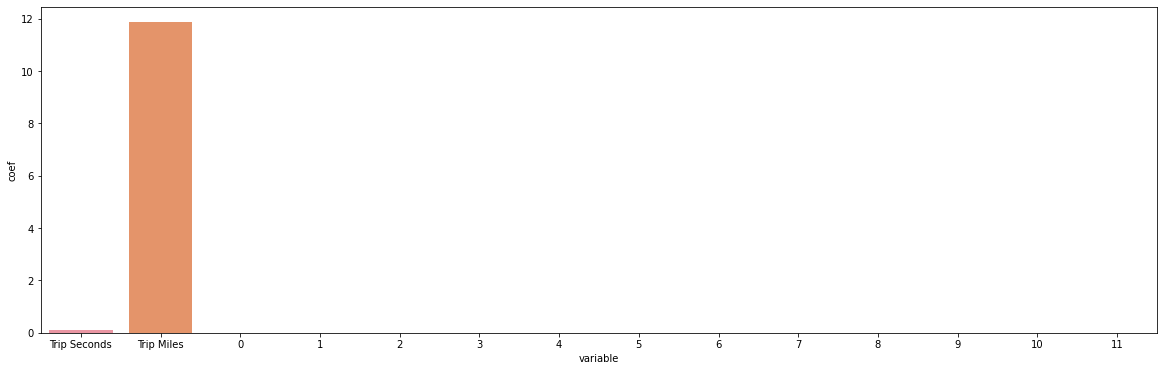

In [29]:
view_coeff(X,lasso)

In [30]:
DT.feature_importances_

array([5.15360464e-02, 9.35360957e-01, 2.64637808e-03, 3.68201591e-04,
       5.25406828e-04, 2.63961489e-04, 7.41846361e-04, 6.82831141e-04,
       2.27075491e-03, 5.18840352e-04, 6.06676101e-04, 6.58584442e-04,
       6.70055663e-04, 3.14945925e-03])

In [31]:
def view_features_rank(X, model):
    plt.figure(figsize=(20,6))
    list_of_features = list(X.columns)
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.feature_importances_,
                                'abs_coef': np.abs(model.feature_importances_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs, order =list_of_features)

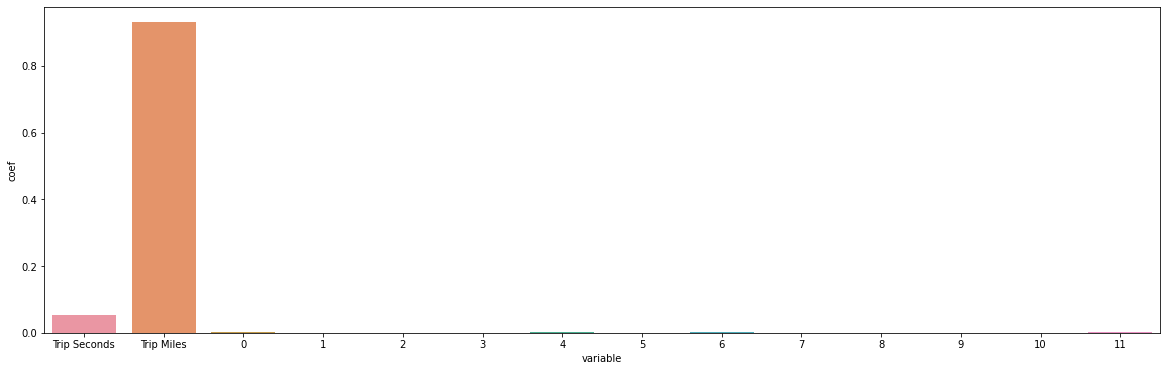

In [181]:
view_features_rank(X,DT)

# for flash cab, they only charge the fair based on Trip miles and trip seconds

In [70]:
X=extracted[['Trip Seconds','Trip Miles']]
y =extracted['Fare']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state =123)
scaler = StandardScaler()

In [71]:
scaler.fit(X_train)
X_train_ss = scaler.transform(X_train)  
X_test_ss = scaler.transform(X_test)

In [72]:
LR=model_LR(X_train_ss, X_test_ss, y_train, y_test)

model score of trained set : 0.9290414841617028
model score of test set : 0.9287551354631328


In [76]:
lasso = model_lasso(X_train_ss, X_test_ss, y_train, y_test)

model score of trained set : 0.9204750948474376
model score of test set : 0.9205544214115867


In [35]:
from sklearn.metrics import mean_squared_error, make_scorer

# Common method 1 across models

def evaluate_model(model,X_train, X_test, y_train, y_test):
    
    # Produce predictions for training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate models
    rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
    print("RMSE on Training set :", rmse_train)
    print("RMSE on Test set :", rmse_test)
    
    # Graphically compare predictions on training and validation set
    plt.figure(figsize=[20,8])
    # Plot residuals
    plt.subplot(1,2,1)
    plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
    plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Test data")
    plt.title(model)
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc = "upper left")
    plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
    # Plot predictions
    plt.subplot(1,2,2)
    plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
    plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Test data")
    plt.title(model)
    plt.xlabel("Predicted values")
    plt.ylabel("Actual values")
    plt.legend(loc = "upper left")
    plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")  

RMSE on Training set : 3.782366718582378
RMSE on Test set : 3.758884399824889


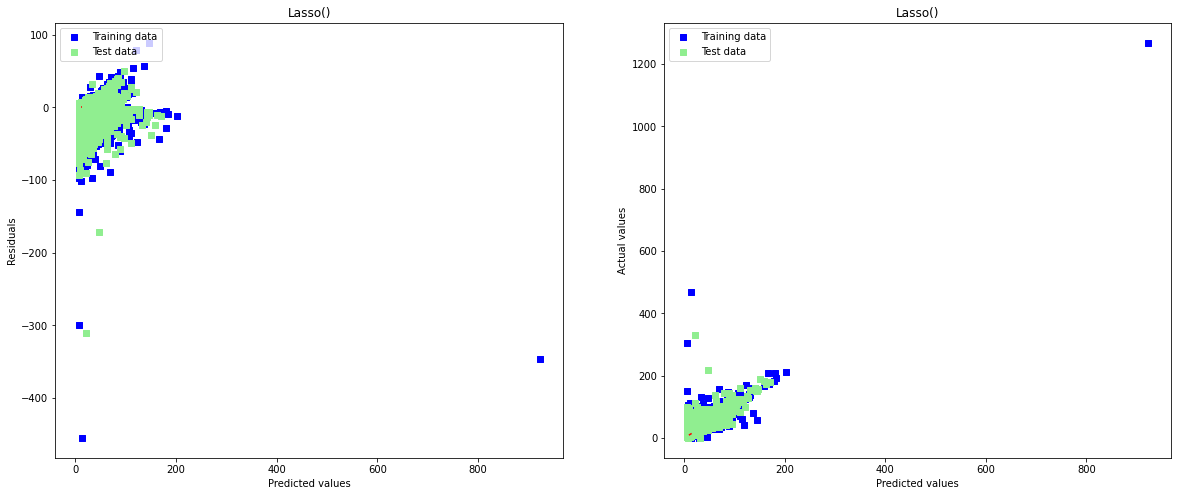

In [77]:
evaluate_model(lasso ,X_train_ss, X_test_ss, y_train, y_test)

RMSE on Training set : 3.572846147663918
RMSE on Test set : 3.5595974425814045


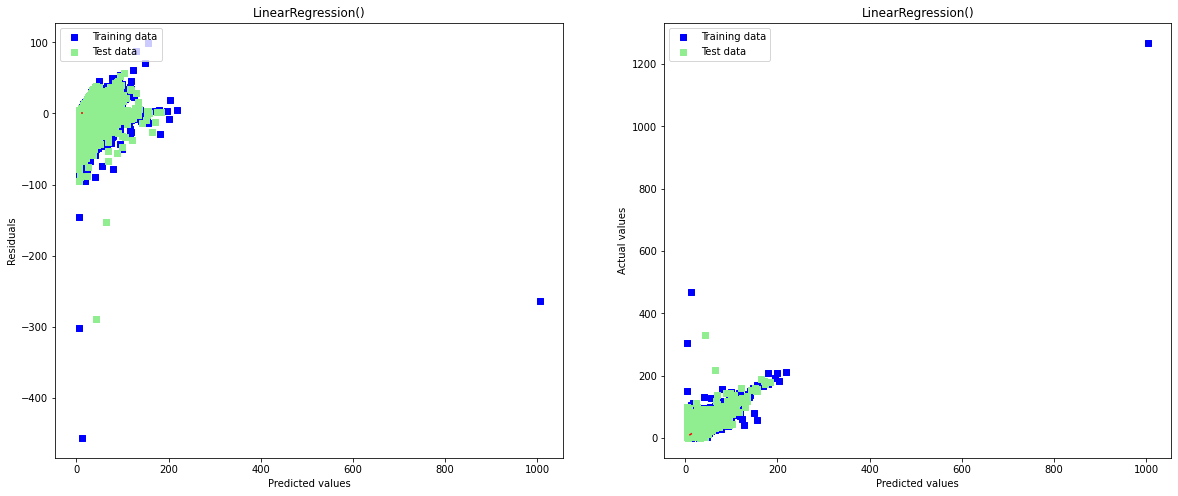

In [36]:
evaluate_model(LR,X_train_ss, X_test_ss, y_train, y_test)

In [37]:
DT=model_DTR(X_train_ss, X_test_ss, y_train, y_test)

model score of trained set : 0.9862845998227077
model score of test set : 0.9300953872828144


RMSE on Training set : 1.5707833724587585
RMSE on Test set : 3.5259570721885316


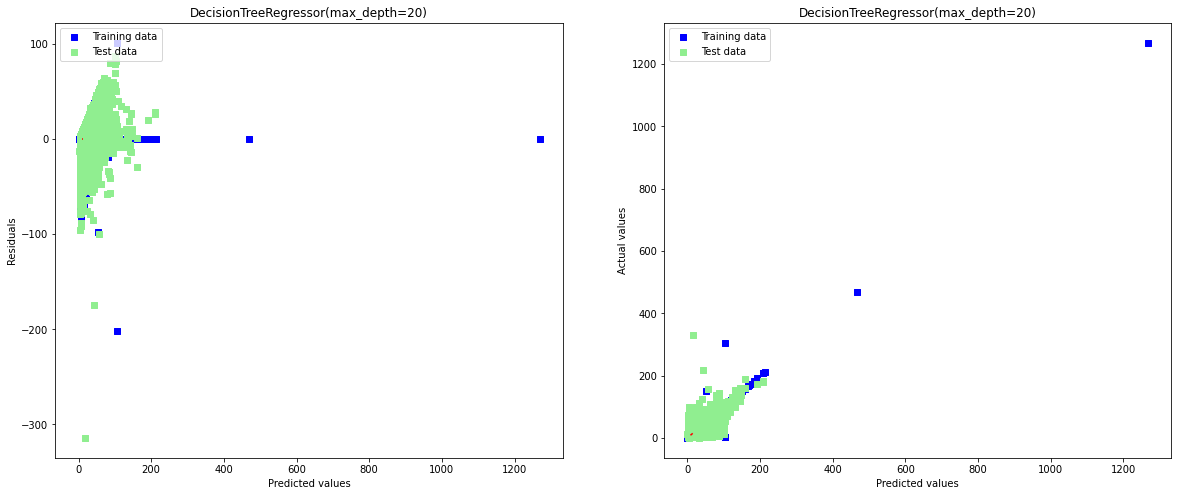

In [38]:
evaluate_model(DT,X_train_ss, X_test_ss, y_train, y_test)

# Hyper parameter tuning  

In [39]:
reg_decision_model=DecisionTreeRegressor()

In [40]:

param_grid = {
              "min_samples_split": [10, 20, 40],
              "max_depth": [15, 20, 25,30],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',verbose=3,n_jobs = -1)

In [43]:
tuning_model.fit(X_train_ss,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25, 30],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]},
             scoring='neg_mean_squared_error', verbose=3)

In [44]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 15,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 40}

In [45]:
# best model score
tuning_model.best_score_

-10.273226039233084

In [52]:
tuned_hyper_model= DecisionTreeRegressor(max_depth= 15,
 max_leaf_nodes= 100,
 min_samples_leaf = 20,
 min_samples_split= 40)

In [53]:
# fitting model


tuned_hyper_model.fit(X_train_ss,y_train)

DecisionTreeRegressor(max_depth=15, max_leaf_nodes=100, min_samples_leaf=20,
                      min_samples_split=40)

In [54]:
tuned_hyper_model.score(X_train_ss,y_train)

0.9453621114589188

In [55]:
tuned_hyper_model.score(X_test_ss,y_test)

0.9542153808426102

RMSE on Training set : 3.1351549319962224
RMSE on Test set : 2.8535396178158146


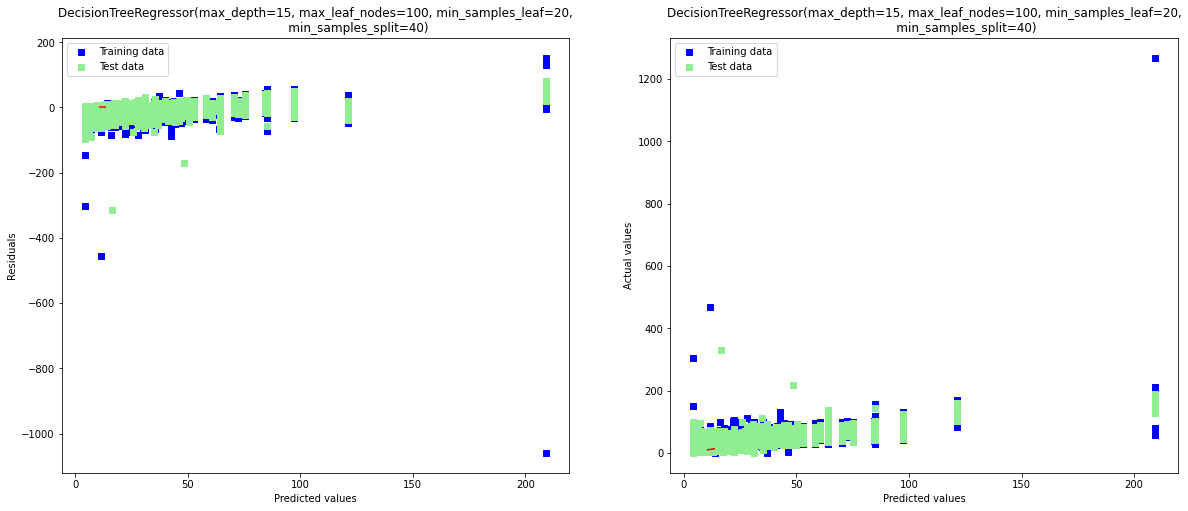

In [57]:
evaluate_model(tuned_hyper_model,X_train_ss, X_test_ss, y_train, y_test)

# Conclusion 

### 1) Flash Cab uses duration and distance of the trip to determine the Fare
### 2) Decision Tree is the better model in predicting the Fare
### 3) Hyper parameter tuning can solve the overfitting problem of the tree model


# Future Work:
### 1) Do segmentation for ‘Company’ to reduce the size of the Categorical Feature (37 Competitors) 
### 2) Build up Fare Prediction model for other companies as well

